In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import FittingWorkCleaner as FWC
import Neutrino_Work as NW
from classy import Class

In [2]:
data_1= np.load("mass-300-life-0.030.npz", allow_pickle=True)
f_actual = data_1['fe'][-1]
e_actual = data_1['e'][-1]
Neff_short = data_1['neff']

data_2= np.load("mass-300-life-0.584.npz", allow_pickle=True)
f_actual_2 = data_2['fe'][-1]
e_actual_2 = data_2['e'][-1]
Neff_long = data_2['neff']


data_file = np.load("test-fit.npz", allow_pickle=True)
e = data_file['eps']
f = data_file['fe']


data_file2 = np.load("test-fit2.npz", allow_pickle=True)
e2 = data_file2['eps']
f2 = data_file2['fe']

In [3]:
def v_masses_nontherm(m_small, normal,filename,poly_degree,plot):
    
    #if normal is True, uses the normal hiearachy, If normal False, uses the inverted hiearachy.
    #if plot is true, neutrino spectra is plotted. If false, spectra is not plotted. parameters returned in both 
    
    actual_data= np.load(filename, allow_pickle=True)
    f_array = actual_data['fe'][-1]
    e_array = actual_data['e'][-1]
    
    mass1,mass2,mass3 = NW.v_masses(m_small,normal)
    
    T_best,N_best,coefficients = FWC.finale(e_array,f_array,poly_degree,plot)
    
    params = '{},{},{},{},{},{},{}'.format(T_best,N_best,coefficients[0],coefficients[1],coefficients[2],coefficients[3],coefficients[4])
    
    af = actual_data['scalefactors'][-1]
    tf = actual_data['temp'][-1]
    value = 1/(af*tf)

    
    neutrino_mass_settings = {'N_ncdm':3,
          'use_ncdm_psd_files': "0,0,0",
          'm_ncdm': '{},{},{}'.format(mass1,mass2,mass3),
          'T_ncdm':'{},{},{}'.format(value,value,value),
          'ncdm_psd_parameters': params,
          'N_ur': 0.0
          }   
    
    LambdaCDM_settings = {'omega_b':0.0223828,
                     #'omega_cdm':0.1201075,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                      'Omega_m':0.309883043,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1,
                    }

    neutrino = Class()
    neutrino.set(LambdaCDM_settings)
    neutrino.set(neutrino_mass_settings)
    neutrino.compute()

    neutrino_results = NW.dict_results(neutrino)
    N_eff = neutrino_results['Neff']   
        
    LambdaCDM_other = {'N_ur':'{},{},{}'.format(N_eff,N_eff,N_eff) #needed to get LambdaCDM Neff closer to model Neff
                     }
    
    LambdaCDM = Class()
    LambdaCDM.set(LambdaCDM_settings)
    LambdaCDM.set(LambdaCDM_other)
    LambdaCDM.compute()
    
    LambdaCDM_results = NW.dict_results(LambdaCDM)
    
    kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3
    h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

    for i,k in enumerate(kk):
        Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)

    
    kk= np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk_neutrino = np.zeros(len(kk))

    for i,k in enumerate(kk):
        Pk_neutrino[i] = neutrino.pk(k*h,0.)*h**3 # function .pk(k,z)
        
    plt.figure()
    plt.loglog(kk,Pk_LambdaCDM)
    plt.loglog(kk,Pk_neutrino,linestyle='--')
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.show()


    plt.figure()
    plt.semilogx(kk,Pk_neutrino/Pk_LambdaCDM-1)
    plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k)^\nu/P(k)-1$')
    plt.show()
    
    
   
    return neutrino_results,LambdaCDM_results
    

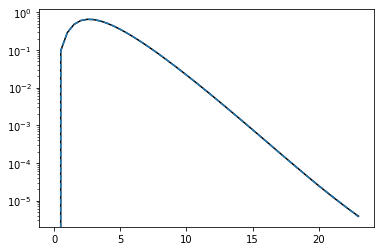

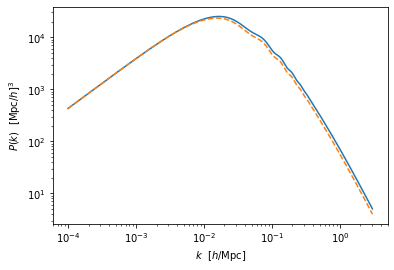

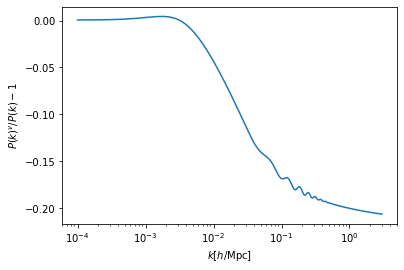

({'age': 13.772636040813154,
  'Neff': 3.0095756649721483,
  'omega_b': 0.022382800000000005,
  'Omega0_cdm': 0.25405127428477653,
  'h': 0.6781,
  'Omega0_k': 0.0,
  'Omega0_m': 0.30988279611598757,
  'Omega_b': 0.04867734979810887,
  'Omega_g': 5.378150968509927e-05,
  'Omega_lambda': 0.6900631754903148,
  'Omega_m': 0.30988279611598757,
  'Omega_r': 5.402839369750757e-05,
  'rs_drag': 148.06250445557112,
  'Sigma8': 0.7519878559416694,
  'Sigma8_cb': 0.7674363055756875,
  'T_cmb': 2.7255,
  'theta_s_100': 1.0477265112007672,
  'theta_star_100': 1.0501218545073563,
  'n_s': 0.9660499,
  'tau_reio': 0.05430842},
 {'age': 13.770623072670812,
  'Neff': 3.0095756649721492,
  'omega_b': 0.022382800000000005,
  'Omega0_cdm': 0.26120569320189113,
  'h': 0.6781,
  'Omega0_k': 0.0,
  'Omega0_m': 0.30988304299999997,
  'Omega_b': 0.04867734979810887,
  'Omega_g': 5.378150968509927e-05,
  'Omega_lambda': 0.69002641600826,
  'Omega_m': 0.30988304299999997,
  'Omega_r': 9.054099174000942e-05,
  '

In [4]:
v_masses_nontherm(0.1,True,"mass-300-life-0.030.npz",4,True)

TypeError: argument of type 'NoneType' is not iterable

Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable


TypeError: argument of type 'NoneType' is not iterable

Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable


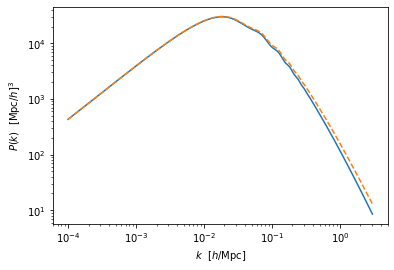

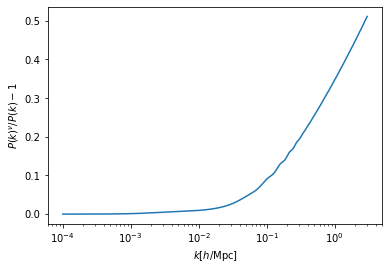

({'age': 13.77281518377072,
  'Neff': 0.6878309035446849,
  'omega_b': 0.022382800000000005,
  'Omega0_cdm': 0.2587277148131082,
  'h': 0.6781,
  'Omega0_k': 0.0,
  'Omega0_m': 0.309883013193762,
  'Omega_b': 0.04867734979810887,
  'Omega_g': 5.378150968509927e-05,
  'Omega_lambda': 0.6900631754903148,
  'Omega_m': 0.309883013193762,
  'Omega_r': 5.381131592313658e-05,
  'rs_drag': 161.2809427824865,
  'Sigma8': 1.0956448562468375,
  'Sigma8_cb': 1.103085878409307,
  'T_cmb': 2.7255,
  'theta_s_100': 1.1415250957813448,
  'theta_star_100': 1.1441569820087525,
  'n_s': 0.9660499,
  'tau_reio': 0.05430842},
 {'age': 13.772339163513132,
  'Neff': 0.6878309035446849,
  'omega_b': 0.022382800000000005,
  'Omega0_cdm': 0.26120569320189113,
  'h': 0.6781,
  'Omega0_k': 0.0,
  'Omega0_m': 0.30988304299999997,
  'Omega_b': 0.04867734979810887,
  'Omega_g': 5.378150968509927e-05,
  'Omega_lambda': 0.6900547742036983,
  'Omega_m': 0.30988304299999997,
  'Omega_r': 6.218279630166203e-05,
  'rs_dra

In [5]:
v_masses_nontherm(0.1,True,"mass-300-life-0.584.npz",4,False)

In [6]:
def cdf_faster1(e,f):
    r = np.zeros(len(e))
    
    y = e**2 * f
    
    for i in range(1, len(r)):
        r[i] = r[i-1] + 0.5 * (y[i-1] + y[i]) * (e[i]-e[i-1])
        
    r /= np.trapz(y,e)
    
    return r

def cdf_array1(e_array,f_array):
    high = np.where(cdf_faster1(e_array,f_array)>2/3)[0][0]
    
    k = len(e_array)-high
    e_array_shorter = np.delete(e_array,np.s_[-k:])
    f_array_shorter = np.delete(f_array,np.s_[-k:])
    
    return e_array_shorter,f_array_shorter

In [7]:
def v_masses_nontherm_no_cdf(m_small, normal,filename,poly_degree,plot):
    
    #if normal is True, uses the normal hiearachy, If normal False, uses the inverted hiearachy.
    #if plot is true, neutrino spectra is plotted. If false, spectra is not plotted. parameters returned in both 
    
    actual_data= np.load(filename, allow_pickle=True)
    f_array = actual_data['fe'][-1]
    e_array = actual_data['e'][-1]
    
    e_please_work,f_please_work = cdf_array1(e_array,e_array*f_array)
    
    mass1,mass2,mass3 = NW.v_masses(m_small,normal)
    
    T_best,N_best,coefficients = FWC.finale_no_cdf(e_please_work,f_please_work,poly_degree,plot)
    
    params = '{},{},{},{},{},{},{}'.format(T_best,N_best,coefficients[0],coefficients[1],coefficients[2],coefficients[3],coefficients[4])
    
    af = actual_data['scalefactors'][-1]
    tf = actual_data['temp'][-1]
    value = 1/(af*tf)

    
    neutrino_mass_settings = {'N_ncdm':3,
          'use_ncdm_psd_files': "0,0,0",
          'm_ncdm': '{},{},{}'.format(mass1,mass2,mass3),
          'T_ncdm':'{},{},{}'.format(value,value,value),
          'ncdm_psd_parameters': params,
          'N_ur': 0.0
          }   
    
    LambdaCDM_settings = {'omega_b':0.0223828,
                     #'omega_cdm':0.1201075,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                      'Omega_m':0.309883043,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1,
                    }

    neutrino = Class()
    neutrino.set(LambdaCDM_settings)
    neutrino.set(neutrino_mass_settings)
    neutrino.compute()

    neutrino_results = NW.dict_results(neutrino)
    N_eff = neutrino_results['Neff']   
        
    LambdaCDM_other = {'N_ur':'{},{},{}'.format(N_eff,N_eff,N_eff) #needed to get LambdaCDM Neff closer to model Neff
                     }
    
    LambdaCDM = Class()
    LambdaCDM.set(LambdaCDM_settings)
    LambdaCDM.set(LambdaCDM_other)
    LambdaCDM.compute()
    
    LambdaCDM_results = NW.dict_results(LambdaCDM)
    
    kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3
    h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

    for i,k in enumerate(kk):
        Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)

    
    kk= np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk_neutrino = np.zeros(len(kk))

    for i,k in enumerate(kk):
        Pk_neutrino[i] = neutrino.pk(k*h,0.)*h**3 # function .pk(k,z)
        
    plt.figure()
    plt.loglog(kk,Pk_LambdaCDM)
    plt.loglog(kk,Pk_neutrino,linestyle='--')
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.show()


    plt.figure()
    plt.semilogx(kk,Pk_neutrino/Pk_LambdaCDM-1)
    plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k)^\nu/P(k)-1$')
    plt.show()
    
    
   
    return neutrino_results,LambdaCDM_results

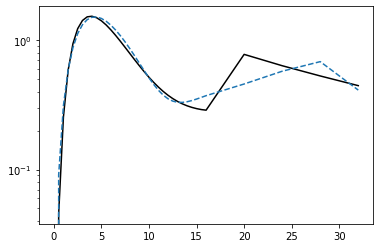

Exception ignored in: Traceback (most recent call last):
  File "/Users/charmquark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/4_/8dqxg1mn27s2m8nmvf9r3nkh0000gp/T/ipykernel_82887/602060168.py", line 1, in <cell line: 1>
    v_masses_nontherm_no_cdf(0.1,True,"mass-300-life-0.584.npz",4,True)
  File "/var/folders/4_/8dqxg1mn27s2m8nmvf9r3nkh0000gp/T/ipykernel_82887/1401094726.py", line 49, in v_masses_nontherm_no_cdf
    neutrino.compute()
  File "classy.pyx", line 389, in classy.Class.compute
'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
classy.CosmoComputationError: 

Error in Class: thermodynamics_init(L:344) :error in thermodynamics_helium_from_bbn(ppr,pba,pth);
=>thermodynamics_helium_from_bbn(L:625) :condition (DeltaNeff > deltaN[num_deltaN-1]) is true; You have asked for an un

CosmoComputationError: 

Error in Class: thermodynamics_init(L:344) :error in thermodynamics_helium_from_bbn(ppr,pba,pth);
=>thermodynamics_helium_from_bbn(L:625) :condition (DeltaNeff > deltaN[num_deltaN-1]) is true; You have asked for an unrealistic high value of Delta N_eff = 2.680012e+01. The corresponding value of the primordial helium fraction cannot be found in the interpolation table. If you really want this value, you should fix YHe to a given value rather than to BBN

In [8]:
v_masses_nontherm_no_cdf(0.1,True,"mass-300-life-0.584.npz",4,True)